# Opening .fits file

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits

image_file = 'example_data/PAL5_3p6um.fits'

#hdu_list = fits.open('example_data/PAL5_3p6um.fits')
#hdu_list.info()

with fits.open('example_data/PAL5_3p6um.fits') as hdu_list:  # this avoids having to manually close file afterwards
    hdu_list.info()

Filename: example_data/PAL5_3p6um.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      67   (1415, 697)   float32   


### Un-comment this to view header details:

In [2]:
hdu_list[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel- floating point                 
NAXIS   =                    2 / STANDARD FITS FORMAT                           
NAXIS1  =                 1415 /  Axis Length                                   
NAXIS2  =                  697 /  Axis Length                                   
TELESCOP= 'Spitzer '           / SPITZER Space Telescope                        
INSTRUME= 'IRAC    '           / SPITZER Space Telescope instrument ID          
CHNLNUM =                    1 / 1 digit instrument channel number              
EXPTYPE = 'sci     '           / Exposure Type                                  
FOVID   =                   74 / Field of View ID                               
FOVNAME = 'IRAC_Center_of_4.5&8.0umArray' / Field of View Name                  
PRODTYPE= 'IMAGE   '           / type of this data                              
OBSRVR  = 'Wendy Freedman'  

In [67]:
image_data = fits.getdata(image_file, ext=0)
print(image_data.shape)

(697, 1415)


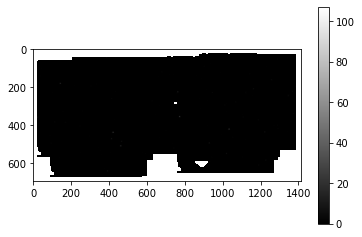

In [68]:
plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()

### Need to decide on best sigma value to use in this stats bit

In [69]:
from astropy.stats import sigma_clipped_stats
mean, median, std = sigma_clipped_stats(image_data, sigma=3.)
print('Mean: {:f}\nMedian: {:f}\nStd: {:f}'.format(mean, median, std))

Mean: 0.048621
Median: 0.047637
Std: 0.011477


In [70]:
from photutils import DAOStarFinder
daofind = DAOStarFinder(threshold=10.*std, fwhm=3.)

Mask test:

In [71]:
mask = np.zeros(image_data.shape, dtype=bool)
mask[100:251, 1000:1401] = True                # listing as y then x, because below we flip the image axes (?)

In [72]:
sources = daofind(image_data - median, mask=mask)
for col in sources.colnames:
    sources[col].info.format = '%.8g'
#print(sources)

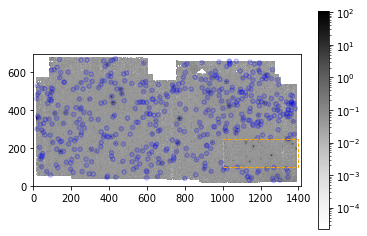

In [75]:
import numpy as np
from matplotlib.colors import LogNorm                           # version from youtube
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize  # version in tutorial
from photutils import CircularAperture, RectangularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=10.)
norm = LogNorm()
#norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(image_data, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
plt.colorbar()
apertures.plot(color='blue', lw=1.5, alpha=0.3)
rect_mask = RectangularAperture((1200, 175), 400, 150)
rect_mask.plot(color='orange', ls='dashed')

#plt.imsave('C:/Users/Jake/MPhys/test_photometry/test_02.png', arr=image_data, format='png', dpi=300) # doesn't work lol
plt.savefig('DAO_detection_test03.png', dpi=500)